In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os.path
%matplotlib inline


fpath = "../../nnn_ml/pov_transform/testBed/menu/menu_saizeriya.jpg"

# If doesn't exist error, otherwise read from path
if not os.path.exists(fpath):
    print(f"File is not in {fpath}!")
else:
    im = cv.imread(fpath)
    h, w = im.shape[:2]

def plot(img, fig = 1):
    axes =[]
    i = 0
    
    if len(img) < 3:
        r = 1; c = 2
    elif len(img) == 3:
        r = 1; c = 3
    elif len(img) > 3:
        r = 2; c = 2
    else:
        r = 1; c = 1
    
    fig = plt.figure(fig)
    for item in img:
        i = i + 1
        axes.append(fig.add_subplot(r,c, i))
        try:
            plt.imshow(cv.cvtColor(item, cv.COLOR_BGR2RGB))
        except:
            plt.imshow(item)

In [2]:
# Converts the image to grayscale
SCALE_F = 0.4
gr = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
res = cv.resize(gr, None, fx=SCALE_F, fy=SCALE_F, interpolation=cv.INTER_CUBIC)
blur = cv.GaussianBlur(gr, (13, 13), 0)


In [3]:
methods = [
    ("THRESH_BINARY", cv.THRESH_BINARY),
    ("THRESH_BINARY_INV", cv.THRESH_BINARY_INV),
    ("THRESH_TRUNC", cv.THRESH_TRUNC),
    ("THRESH_TOZERO", cv.THRESH_TOZERO),
    ("THRESH_TOZERO_INV", cv.THRESH_TOZERO_INV)]

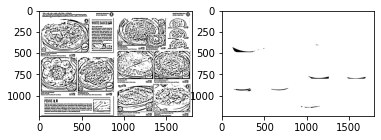

In [4]:
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 21, 4)
(T, t2) = cv.threshold(blur, 20, 255, cv.THRESH_BINARY)
plot([thresh, t2], 1)

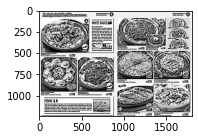

In [5]:
mask = np.zeros(thresh.shape[:2], dtype=im.dtype)
#cv.rectangle(mask, (200, 100), (1000, 700), 255, -1)
masked = cv.bitwise_and(gr, t2, mask=thresh)

plot([masked], 1)


In [ ]:
test = cv.dilate(im, np.ones((3,3), np.int8))
b,g,r = cv.split(test)
eqr = cv.equalizeHist(r)
eqg = cv.equalizeHist(g)
eqb = cv.equalizeHist(b)
plot([eqr], 2)

40705.0
[INFO] eps=0.0010, num_pts=100
32958.0
[INFO] eps=0.0010, num_pts=68
30078.5
[INFO] eps=0.0010, num_pts=99
25577.5
[INFO] eps=0.0010, num_pts=55
18095.5
[INFO] eps=0.0010, num_pts=116
17815.0
[INFO] eps=0.0010, num_pts=93
13498.5
[INFO] eps=0.0010, num_pts=83
11538.0
[INFO] eps=0.0010, num_pts=123
11455.0
[INFO] eps=0.0010, num_pts=84
10990.0
[INFO] eps=0.0010, num_pts=62
8471.5
[INFO] eps=0.0010, num_pts=189
6566.5
[INFO] eps=0.0010, num_pts=118


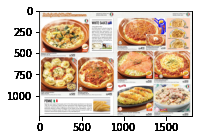

In [12]:
cnt, hi = cv.findContours(masked.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = sorted(cnt, key=cv.contourArea, reverse=True)[:13]

for i in range(12):
    c = cnt[i + 1]
    for eps in np.linspace(0.001, 0.05, 10):
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, eps * peri, True)
        text = "eps={:.4f}, num_pts={}".format(eps, len(approx))

        print(cv.contourArea(c))
        print("[INFO] {}".format(text))
        test = cv.drawContours(im.copy(), [approx], -1, (255,0,0), -1)
        plot([test])

In [ ]:
shap = np.zeros(im.shape[:2], dtype=np.float32)
cv.circle(shap, [im.shape[1]//2, im.shape[0]//2], im.shape[0]//2, 255, -1)
vign = cv.GaussianBlur(shap, (7 ,7), 3)
plt.imshow(vign)

In [ ]:
cv.imshow("A", eqg)
cv.waitKey()
cv.destroyAllWindows()